In [1]:
import scraper2 as s
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
import seaborn as sns
from yahoo_fin import options
from yahoo_fin.stock_info import *
from yahoo_fin.stock_info import get_data, get_splits
import mibian
import time
m = s.stockMongo()
import indicator as i

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


In [3]:
op = m.stock_data.options_data2.find()
op.count()

C:\Users\ander\AppData\Local\Temp/ipykernel_21720/3622889483.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  op.count()


455549

In [19]:
def dict_parse(df):
    return pd.DataFrame.from_records(df['options'])

In [41]:
start_time = time.time()
op = m.stock_data.options_data2.find({'sym':'JPM'})
df = pd.DataFrame.from_records(op)
df1 = df.apply(dict_parse, axis=1)
df1 = pd.concat(df1.tolist())
df1.head()
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9917817115783691 seconds ---


In [43]:
df1.describe()

,Ask,Bid,Change,Last Price,Open Interest,Strike
count,19910.000000,19910.000000,19910.000000,20060.000000,19910.000000,19910.000000
mean,22.789525,21.564110,-0.175028,22.565054,1154.395881,150.023355
std,26.734270,25.995311,1.213375,26.897255,2313.225443,46.289036
min,0.050000,0.000000,-7.700000,0.010000,0.000000,50.000000
25%,2.100000,1.620000,-0.090000,1.950000,24.000000,115.000000
50%,11.400000,10.000000,0.000000,11.190000,152.000000,150.000000
75%,35.250000,33.400000,0.000000,35.850000,1220.000000,180.000000
max,116.100000,112.050000,6.990000,151.150000,23742.000000,250.000000


In [14]:
start_time = time.time()
ticker = c[10]
apple = m.get_options(tickers[2])
apple['time'] = apple['strike-date'] - apple.index
apple['time'] = apple['time'].dt.total_seconds() / (24 * 60 * 60)
apple['Last Trade Date'] = apple['Last Trade Date'].str.slice(stop=10)
apple['Last Trade Date'] = pd.to_datetime(apple['Last Trade Date'], format='%Y-%m-%d')
apple = apple.reset_index()
strike_dates = apple.pivot_table(columns="strike-date", values="date", aggfunc=np.count_nonzero).columns
#strike_dates[6]
apple2 = apple[apple['strike-date']==strike_dates[7]]
#apple2 = apple2[apple2['date']==apple2['Last Trade Date']]
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'tickers' is not defined

In [27]:
symbols = m.get_symbols()
tickers = []
for sym in symbols:
    tickers.append(sym['sym'])

In [7]:
tickers[1634]

'LQDI'

In [10]:
apple2.tail()

,date,% Change,Ask,Bid,Change,Contract Name,Implied Volatility,Last Price,Last Trade Date,Open Interest,Strike,Volume,strike-date,type,time
26479,2022-03-06,-,14.10,13.45,0.00,ABT220318P00135000,44.09%,18.47,2022-02-18,82.0,135.0,1.0,2022-03-18,put,12.0
26480,2022-03-06,-,19.45,18.20,0.00,ABT220318P00140000,62.74%,18.30,2022-02-25,1.0,140.0,1.0,2022-03-18,put,12.0
26481,2022-03-06,-,22.90,22.25,0.00,ABT220318P00145000,0.00%,24.25,2022-01-26,0.0,145.0,2.0,2022-03-18,put,12.0
26482,2022-03-06,+0.17%,29.30,28.40,0.05,ABT220318P00150000,63.87%,28.70,2022-03-04,80.0,150.0,40.0,2022-03-18,put,12.0
26483,2022-03-06,-,48.30,46.15,0.00,ABT220318P00170000,0.00%,49.50,2022-01-28,0.0,170.0,1.0,2022-03-18,put,12.0


In [15]:
# set stock ticker symbol
stock_symbol = c[10]
 
# set date range for historical prices
end_time = date.today()
start_time = end_time - timedelta(days=400)
 
# reformat date range
end = end_time.strftime('%Y-%m-%d')
start = start_time.strftime('%Y-%m-%d')
 
# get daily stock prices over date range
prices = get_data(stock_symbol, start, end, 'daily')
#compute daily returns and 20 day moving historical volatility
window_size = 20
prices['returns']=prices['close'].pct_change()
prices['volatility']=prices['returns'].rolling(window_size).std()*(252**0.5)
prices['date'] = prices.index
prices.tail()

,open,high,low,close,adjclose,volume,ticker,returns,volatility,date
2022-03-01,8.51,8.59,7.74,7.96,7.96,1574900,AHT,-0.075494,0.874037,2022-03-01
2022-03-02,7.97,8.42,7.93,8.32,8.32,1045400,AHT,0.045226,0.880576,2022-03-02
2022-03-03,8.31,8.41,7.66,7.85,7.85,1495600,AHT,-0.056490,0.886295,2022-03-03
2022-03-04,7.60,7.68,7.15,7.31,7.31,1432300,AHT,-0.068790,0.909155,2022-03-04
2022-03-04,7.60,7.68,7.15,7.31,7.31,1433908,AHT,0.000000,0.897911,2022-03-04


In [7]:
c = ['AMWD', 'AMNB', 'AON', 'ANDE', 'ARWR', 'TEN', 'ASB', 'ASPS', 'ALTR', 'AGRX', 'AHT', 'AKBA', 'ARLP', 'AVAV', 'EBF', 'EB', 'AMSWA', 'ATNI', 'ABEV', 'AGM', 'ANSS', 'HXL', 'ADM', 'AKTS', 'AXNX', 'AMLP', 'KNSA', 'AMT', 'ARAY', 'AROC', 'EBS', 'APT', 'WDC', 'AMCX', 'ATLC', 'ATSG', 'ARCC', 'ATRS', 'ADMP', 'CLSD', 'KNX', 'NAVB', 'AUDC', 'HY', 'AEM', 'AUTO', 'AVTR', 'ACM', 'ALDX', 'ATVI', 'ACIW', 'ASC', 'AGIO', 'PINC', 'KRC', 'ALSN', 'KOD', 'TECH', 'AVGO', 'ADSK', 'AG', 'CLW', 'AL', 'WCC', 'ADP', 'ATHM', 'WHD', 'AVRO', 'ALLE', 'SATS', 'ARCO', 'PK', 'ACRE', 'ACWI', 'ALGT', 'AGX', 'AMPH', 'NBIX', 'ALBO', 'CLX', 'AEIS', 'APLS', 'ARAV', 'AKRO', 'APPN', 'APTV', 'AM', 'AGYS', 'AQMS', 'APPF', 'CLNE', 'WDFC', 'KSU', 'WBS', 'KRO', 'ACIU', 'AWRE', 'KPTI', 'AGS', 'ATRA']

In [44]:
o = i.Options('T')
o.options

C:\Users\ander\Documents\yahooScraper\scrape\lib\site-packages\cryptography\x509\base.py:531: CryptographyDeprecationWarning: Parsed a negative serial number, which is disallowed by RFC 5280.
  return rust_x509.load_pem_x509_certificate(data)


AttributeError: 'Options' object has no attribute 'options'

In [25]:
s = o.returns
#s[s.is_won].plot.scatter(x='probability', y='return')
s.plot.scatter(x='rel_risk', y='return')
#s[(s['rel_risk']>0)&(s['return']>0)].plot.scatter(x='rel_risk', y='return')
#o.strikeDates[0].volRange

AttributeError: 'Options' object has no attribute 'returns'

<AxesSubplot:>

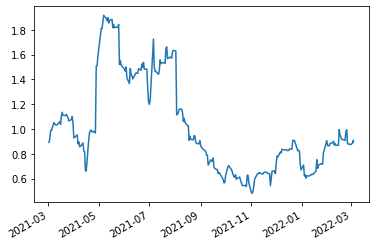

In [17]:
prices.volatility.plot()

In [31]:
m.add("MSFT")

'MSFT' added to the database


In [49]:
len(tickers)

1636

In [29]:
"msft" in tickers

True